In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
df = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_4/data_after_4_pca.csv', index_col=0)
target = pd.read_csv('/home/student/Desktop/dkakurkina/Hometask_3/data_after_3.csv', usecols=['gap'])
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,,,,,,,,,,,,,,,,,,,,,
-0.604170,0.237525,0.283333,0.045588,0.527156,0.270242,1.145601,-0.170155,-0.169811,0.076630,0.054693,...,0.122803,0.025203,0.045760,0.072807,-0.149670,-0.011733,-0.069535,-0.012766,0.105858,-0.093760
-0.347135,0.139937,-0.258744,-0.121981,0.458532,0.508324,0.151736,0.306457,0.009194,0.138843,-0.015971,...,0.080862,-0.025267,-0.138390,0.128893,-0.031847,-0.107370,-0.068212,-0.071979,-0.044475,-0.132394
0.701499,-0.188413,-0.210452,0.072145,-0.213668,0.624503,-0.332767,0.160913,0.038727,0.064025,0.347949,...,0.000719,0.052153,-0.100764,-0.000448,0.120188,0.094319,-0.067703,-0.074843,-0.068034,-0.073349
0.013125,-0.510050,0.469134,-0.625589,0.334546,-0.261340,-0.274490,0.239957,0.123403,-0.662065,0.511011,...,-0.206139,-0.170027,-0.022951,0.098511,0.215221,0.271034,-0.178369,0.135966,0.132656,0.062851
-0.093144,0.580057,0.857155,0.287080,0.021263,-0.008520,0.805054,-0.513233,-0.090120,-0.356480,0.129567,...,-0.046059,-0.002790,-0.040465,0.115696,-0.155720,-0.063864,-0.033397,0.026735,0.035265,-0.028553


Разделим целевую переменную на 3 категории согласно квантилям

In [3]:
quartiles = target.quantile([0.33, 0.66])
q1 = quartiles.iloc[0]
q2 = quartiles.iloc[1]
labels = np.where(target < q1, 0, np.where(target < q2, 1, 2))

Построим графики по 3 разным методам кластеризации

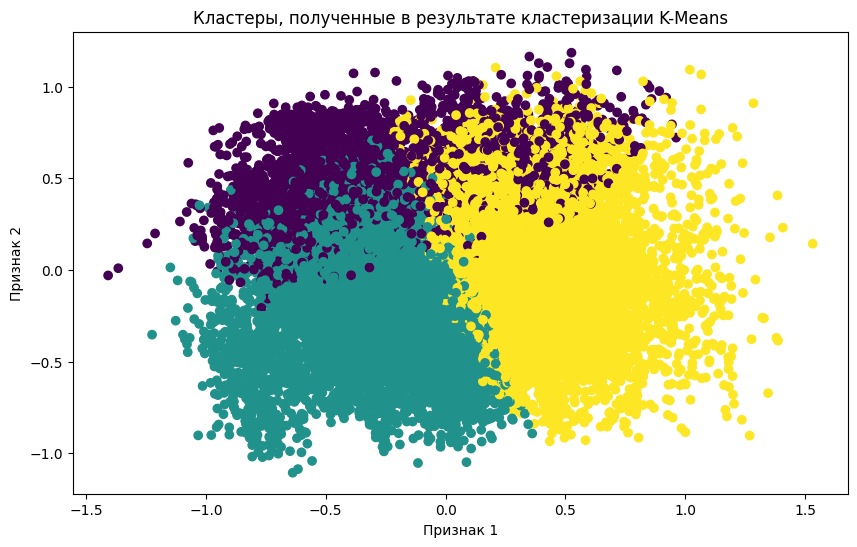

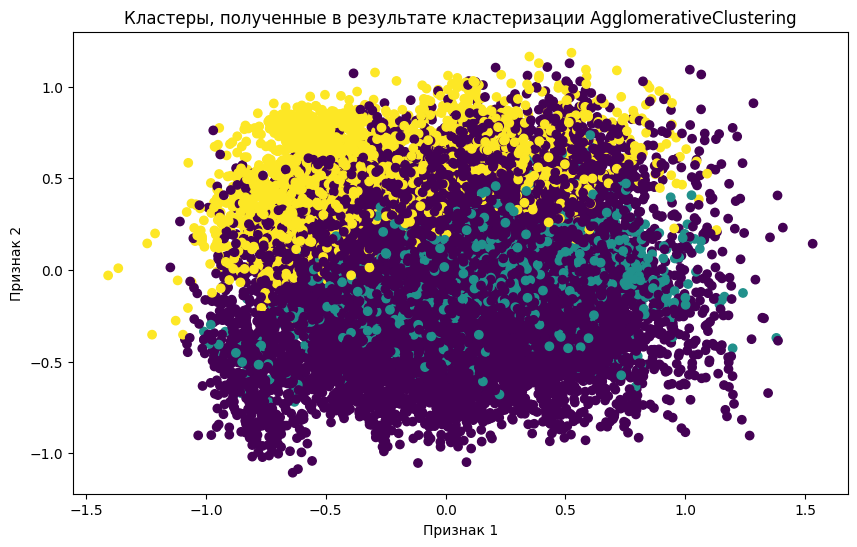

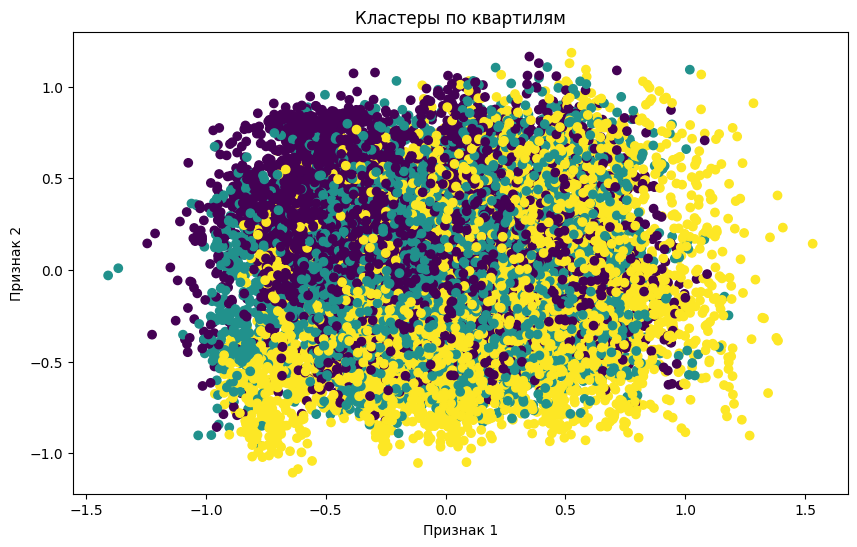

In [4]:
kmeans = KMeans(init="random", n_clusters=3,
                n_init=10,max_iter=300,random_state=42)
clusters_kmeans = kmeans.fit_predict(df)

agglomerative = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters_agglomerative = agglomerative.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_kmeans)
plt.title('Кластеры, полученные в результате кластеризации K-Means')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters_agglomerative)
plt.title('Кластеры, полученные в результате кластеризации AgglomerativeClustering')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.title('Кластеры по квартилям')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

Silhouette Score (Коэффициент Силуэта): Это показатель, который оценивает, насколько каждый объект находится близко к остальным объектам в своем собственном кластере и одновременно далеко от объектов в соседних кластерах. Он принимает значения от -1 до 1, где значения ближе к 1 указывают на более качественную кластеризацию.
Adjusted Rand Index (ARI): Это индекс, который оценивает схожесть между двумя разбиениями данных, независимо от их масштаба. Значения ARI также варьируются от -1 до 1, где значения, близкие к 1, свидетельствуют о более сильной схожести между разбиениями.

Вычислим средние коэффициенты методов кластеризации и индексы ARI

In [5]:
silhouette_avg_quatiles = metrics.silhouette_score(df, labels.ravel())
silhouette_avg_kmeans = metrics.silhouette_score(df, clusters_kmeans.ravel())
silhouette_avg_agglomerative = metrics.silhouette_score(df, clusters_agglomerative.ravel())
adjusted_rand_kmeans = metrics.adjusted_rand_score(labels.ravel(), clusters_kmeans.ravel())
adjusted_rand_agglomerative = metrics.adjusted_rand_score(labels.ravel(), clusters_agglomerative.ravel())
print('Средний коэффициент силуэта по квартилям:', round(silhouette_avg_quatiles, 4), 
      '\nСредний коэффициент силуэта по kmeans:', round(silhouette_avg_kmeans, 4),
      '\nСредний коэффициент силуэта по agglomerative:', round(silhouette_avg_agglomerative, 4),
      '\nARI по kmeans:', round(adjusted_rand_kmeans, 4),
      '\nARI по agglomerative:', round(adjusted_rand_agglomerative, 4))

Средний коэффициент силуэта по квартилям: 0.0072 
Средний коэффициент силуэта по kmeans: 0.052 
Средний коэффициент силуэта по agglomerative: 0.0842 
ARI по kmeans: 0.0176 
ARI по agglomerative: 0.0089


Коэффициент силуэта для алгоритма кластеризации agglomerative значительно превышает показатель метода kmeans и "правильных" меток, определенных по квартилям. Это свидетельствует о более выраженной внутрикластерной связности и четком разделении кластеров друг от друга при использовании алгоритма agglomerative. С другой стороны, индекс Adjusted Rand (ARI) для метода kmeans превышает результаты алгоритма agglomerative, что указывает на более точное соответствие кластеризации предполагаемым "правильным" меткам, основанным на разбиении по квартилям.